# Getting Started with Bible Text Analysis

## Welcome! 👋

This notebook will teach you the basics of data analysis using the Bible as our text dataset. Don't worry if you're new to data science - we'll go step by step!

### What You'll Learn:
1. How to load and read text data
2. Basic text analysis (word counts, frequencies)
3. Data visualization (charts and graphs)
4. Simple statistical analysis

### Let's Get Started! 🚀

## Step 1: Import Libraries

Libraries are pre-written code that help us do complex tasks easily. Think of them as tools in a toolbox.

In [1]:
# pandas: for working with data tables
import pandas as pd

# matplotlib & seaborn: for creating charts and graphs
import matplotlib.pyplot as plt
import seaborn as sns

# For text analysis
from collections import Counter
import re

# Make graphs look nice
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries loaded successfully!")
print("Ready to analyze the Bible text! 📖")

✅ Libraries loaded successfully!
Ready to analyze the Bible text! 📖


## Step 2: Load the Bible Text

Let's read the Bible text file that's already in your data folder.

In [2]:
# Read the Bible text file
with open('../data/raw/kjv_bible.txt', 'r', encoding='utf-8') as file:
    bible_text = file.read()

# Let's see how much text we have
print(f"Total characters: {len(bible_text):,}")
print(f"\nFirst 500 characters:")
print(bible_text[:500])

Total characters: 4,332,679

First 500 characters:
*** START OF THE PROJECT GUTENBERG EBOOK 10 ***
The Old Testament of the King James Version of the Bible
The First Book of Moses: Called Genesis
The Second Book of Moses: Called Exodus
The Third Book of Moses: Called Leviticus
The Fourth Book of Moses: Called Numbers
The Fifth Book of Moses: Called Deuteronomy
The Book of Joshua
The Book of Judges
The Book of Ruth
The First Book of Samuel
The Second Book of Samuel
The First Book of the Kings
The Second Book of the Kings
The First Book of the Chr


## Step 3: Basic Text Analysis

### Let's count words!

We'll split the text into individual words and count them.

In [11]:
# Convert to lowercase and split into words
words = bible_text.lower().split()

# Remove punctuation from words
words_clean = [re.sub(r'[^a-z]', '', word) for word in words if re.sub(r'[^a-z]', '', word)]

print(f"Total words in the Bible: {len(words_clean):,}")
print(f"\nFirst 20 words: {words_clean[:50]}")

Total words in the Bible: 790,405

First 20 words: ['start', 'of', 'the', 'project', 'gutenberg', 'ebook', 'the', 'old', 'testament', 'of', 'the', 'king', 'james', 'version', 'of', 'the', 'bible', 'the', 'first', 'book', 'of', 'moses', 'called', 'genesis', 'the', 'second', 'book', 'of', 'moses', 'called', 'exodus', 'the', 'third', 'book', 'of', 'moses', 'called', 'leviticus', 'the', 'fourth', 'book', 'of', 'moses', 'called', 'numbers', 'the', 'fifth', 'book', 'of', 'moses']


## Step 4: Find the Most Common Words

Let's discover which words appear most frequently in the Bible!

In [4]:
# Count word frequencies
word_counts = Counter(words_clean)

# Get the 20 most common words
most_common = word_counts.most_common(20)

print("Top 20 Most Frequent Words in the Bible:\n")
for rank, (word, count) in enumerate(most_common, 1):
    print(f"{rank:2d}. '{word}' appears {count:,} times")

Top 20 Most Frequent Words in the Bible:

 1. 'the' appears 64,115 times
 2. 'and' appears 51,696 times
 3. 'of' appears 34,722 times
 4. 'to' appears 13,598 times
 5. 'that' appears 12,912 times
 6. 'in' appears 12,667 times
 7. 'he' appears 10,419 times
 8. 'shall' appears 9,838 times
 9. 'unto' appears 8,997 times
10. 'for' appears 8,971 times
11. 'i' appears 8,854 times
12. 'his' appears 8,473 times
13. 'a' appears 8,177 times
14. 'lord' appears 7,830 times
15. 'they' appears 7,376 times
16. 'be' appears 7,013 times
17. 'is' appears 6,989 times
18. 'him' appears 6,659 times
19. 'not' appears 6,596 times
20. 'them' appears 6,430 times


## Step 5: Create Your First Visualization! 📊

Let's make a bar chart showing the most common words.

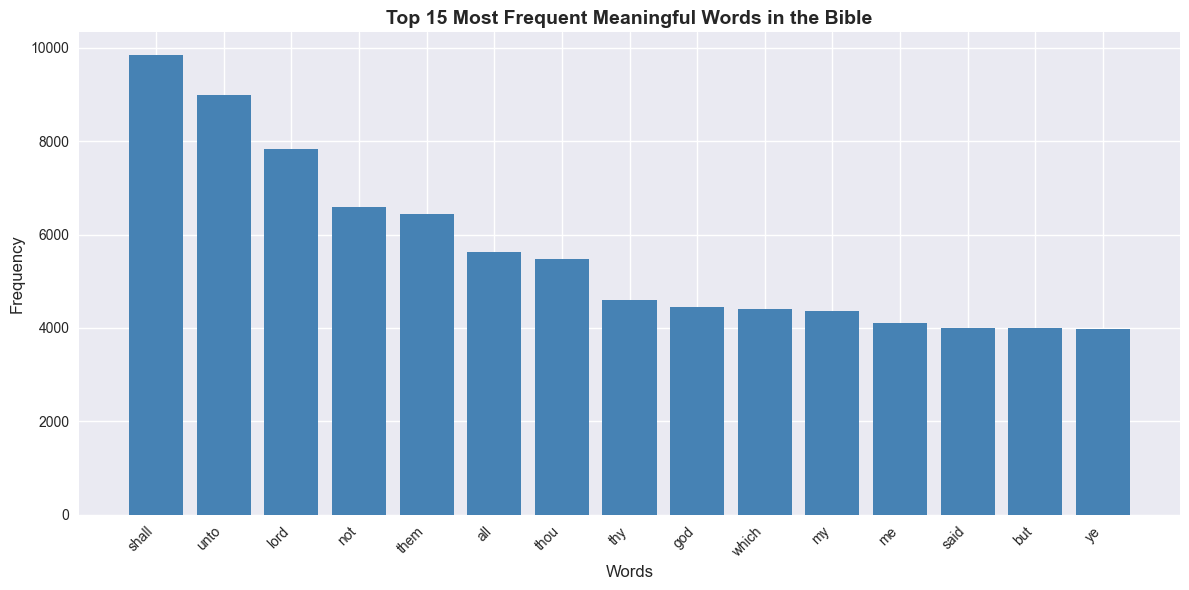

📊 Your first data visualization is complete!


In [5]:
# Get top 15 words (excluding very common words like 'the', 'and', etc.)
# These are called "stop words"
stop_words = {'the', 'and', 'of', 'to', 'a', 'in', 'that', 'he', 'is', 'for', 'it', 'with', 'as', 'his', 'i', 'was', 'be', 'they', 'him'}
meaningful_words = [(word, count) for word, count in word_counts.most_common(50) if word not in stop_words][:15]

# Prepare data for plotting
words_list = [word for word, count in meaningful_words]
counts_list = [count for word, count in meaningful_words]

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(words_list, counts_list, color='steelblue')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 15 Most Frequent Meaningful Words in the Bible', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("📊 Your first data visualization is complete!")

## Step 6: Analyze Word Lengths

How long are the words in the Bible on average?

In [6]:
# Calculate word lengths
word_lengths = [len(word) for word in words_clean]

# Calculate statistics
average_length = sum(word_lengths) / len(word_lengths)
shortest_word = min(word_lengths)
longest_word = max(word_lengths)

print(f"Word Length Statistics:")
print(f"  Average word length: {average_length:.2f} letters")
print(f"  Shortest word: {shortest_word} letter(s)")
print(f"  Longest word: {longest_word} letters")

# Find the actual longest words
longest_words = [word for word in words_clean if len(word) == longest_word]
print(f"\nExamples of longest words ({longest_word} letters): {list(set(longest_words))[:5]}")

Word Length Statistics:
  Average word length: 4.08 letters
  Shortest word: 1 letter(s)
  Longest word: 18 letters

Examples of longest words (18 letters): ['mahershalalhashbaz']


## Step 7: Word Length Distribution

Let's visualize how word lengths are distributed.

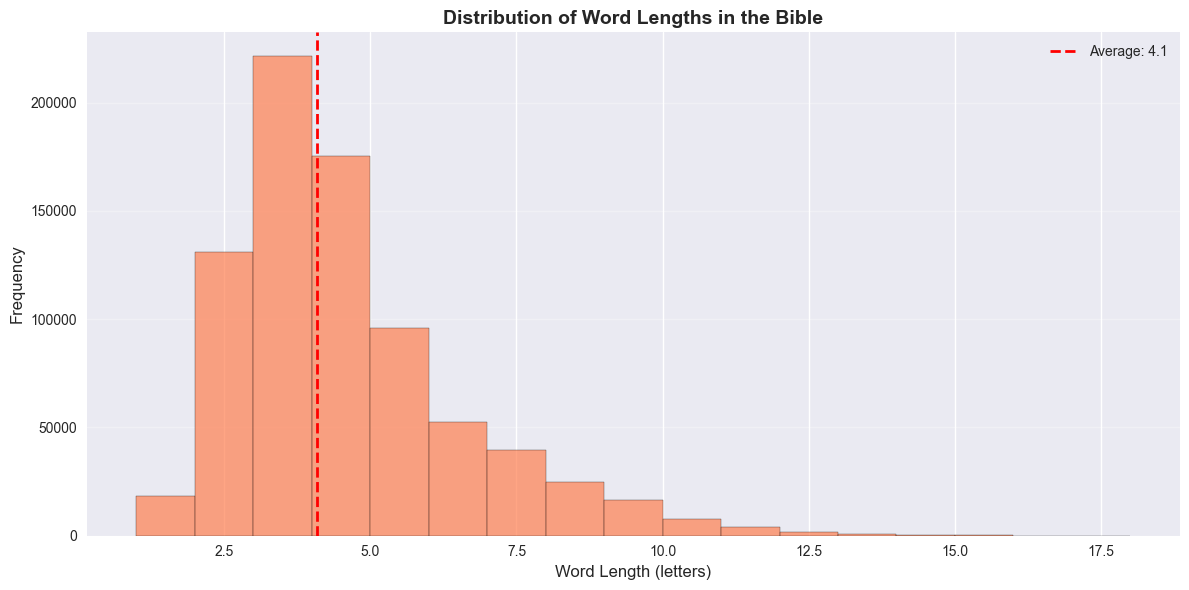

In [7]:
# Create histogram
plt.figure(figsize=(12, 6))
plt.hist(word_lengths, bins=range(1, max(word_lengths)+1), color='coral', edgecolor='black', alpha=0.7)
plt.xlabel('Word Length (letters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Word Lengths in the Bible', fontsize=14, fontweight='bold')
plt.axvline(average_length, color='red', linestyle='--', linewidth=2, label=f'Average: {average_length:.1f}')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

## Step 8: Unique Words (Vocabulary)

How many different words are used in the Bible?

In [8]:
# Count unique words
unique_words = set(words_clean)
total_words = len(words_clean)
vocabulary_size = len(unique_words)

print(f"Vocabulary Analysis:")
print(f"  Total words: {total_words:,}")
print(f"  Unique words (vocabulary): {vocabulary_size:,}")
print(f"  Vocabulary diversity: {(vocabulary_size/total_words)*100:.2f}%")
print(f"\nThis means {vocabulary_size:,} different words are used to write {total_words:,} total words!")

Vocabulary Analysis:
  Total words: 790,405
  Unique words (vocabulary): 12,690
  Vocabulary diversity: 1.61%

This means 12,690 different words are used to write 790,405 total words!


## Step 9: Search for Specific Words

Let's search for how many times specific words appear.

In [9]:
# Search for specific words
search_words = ['love', 'faith', 'hope', 'peace', 'joy', 'grace', 'mercy', 'god', 'lord', 'jesus']

print("Word Frequency Analysis:\n")
word_freq_data = []
for word in search_words:
    count = word_counts.get(word, 0)
    word_freq_data.append({'Word': word.capitalize(), 'Frequency': count})
    print(f"  '{word.capitalize()}' appears {count:,} times")

# Create a dataframe (data table)
df = pd.DataFrame(word_freq_data)
print("\n📊 Data Table:")
print(df)

Word Frequency Analysis:

  'Love' appears 310 times
  'Faith' appears 247 times
  'Hope' appears 129 times
  'Peace' appears 429 times
  'Joy' appears 165 times
  'Grace' appears 170 times
  'Mercy' appears 276 times
  'God' appears 4,443 times
  'Lord' appears 7,830 times
  'Jesus' appears 983 times

📊 Data Table:
    Word  Frequency
0   Love        310
1  Faith        247
2   Hope        129
3  Peace        429
4    Joy        165
5  Grace        170
6  Mercy        276
7    God       4443
8   Lord       7830
9  Jesus        983


## Step 10: Visualize Your Search Results

Let's create a nice chart for these important words!

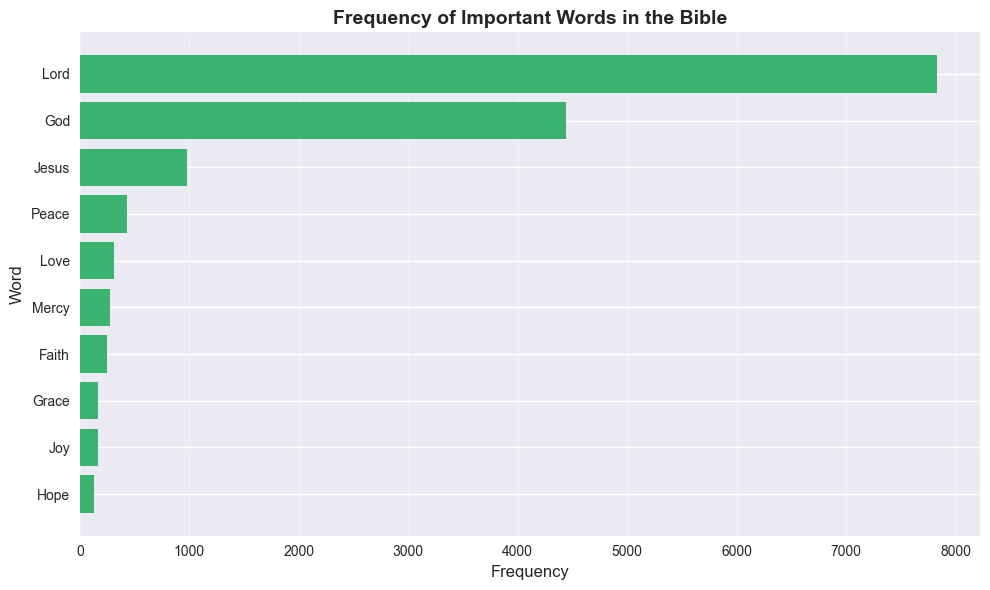

In [10]:
# Create horizontal bar chart
plt.figure(figsize=(10, 6))
df_sorted = df.sort_values('Frequency', ascending=True)
plt.barh(df_sorted['Word'], df_sorted['Frequency'], color='mediumseagreen')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Word', fontsize=12)
plt.title('Frequency of Important Words in the Bible', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 🎉 Congratulations!

You've completed your first data analysis! Here's what you learned:

✅ **Loading data** from files  
✅ **Basic text processing** (splitting, cleaning)  
✅ **Counting and statistics** (word frequencies, averages)  
✅ **Data visualization** (bar charts, histograms)  
✅ **Using pandas** to organize data  

### Next Steps:
1. Try modifying the code above
2. Search for different words
3. Create your own visualizations
4. Move on to `01_data_acquisition.ipynb` for more advanced analysis

### Practice Ideas:
- Search for your favorite words
- Change the colors of the charts
- Try analyzing different sections of the Bible
- Count how many times specific names appear

**Remember**: Data analysis is all about exploring and asking questions! 🔍